In [1]:
import pandas as pd
import numpy as np

In [2]:
# unioned transaction data is loaded
atm_transactions = pd.read_csv("fulltransactiondata.csv")


In [6]:
# The first few rows are checked
print(atm_transactions.head())

#The shape of the dataset
print("The shape of the Dataset:", atm_transactions.shape)

# Duplicates are removed
atm_transactions.drop_duplicates(inplace=True)

# Missing values are checked
missing_values = atm_transactions.isnull().sum()
print("Missing values:\n", missing_values)

        TransactionID TransactionStartDateTime TransactionEndDateTime  \
0  EN-2022-1000000001            1/1/2022 7:01          1/1/2022 7:04   
1  EN-2022-1000000002            1/1/2022 7:02          1/1/2022 7:06   
2  EN-2022-1000000003            1/1/2022 7:02          1/1/2022 7:07   
3  EN-2022-1000000004            1/1/2022 7:06          1/1/2022 7:12   
4  EN-2022-1000000005            1/1/2022 7:06          1/1/2022 7:09   

       Date CardholderID LocationID  TransactionTypeID  TransactionAmount  \
0  1/1/2022  EN-003-1067     EN-003                  4               3000   
1  1/1/2022  EN-006-1040     EN-006                  1               4000   
2  1/1/2022  EN-002-1080     EN-002                  1               9000   
3  1/1/2022  EN-002-1024     EN-002                  1              10000   
4  1/1/2022  EN-001-1095     EN-001                  4              10000   

   Hour_Key  Location Name  ...      date  Year Month Name Month Quarter  \
0         7     Agbani

In [9]:
# Sanity check for key columns for human validation
print("\nUnique values in Gender:", atm_transactions['Gender'].unique())
print("Unique Account Types:", atm_transactions['AccountType'].unique())
print("Transaction Amount Stats:")
print(atm_transactions['TransactionAmount'].describe())



Unique values in Gender: ['M' 'F']
Unique Account Types: ['Savings' 'Current']
Transaction Amount Stats:
count    1.048575e+06
mean     1.762296e+04
std      2.169722e+04
min      0.000000e+00
25%      6.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      1.000000e+05
Name: TransactionAmount, dtype: float64


In [10]:
med = atm_transactions["TransactionAmount"].median()
print("Median:", med)

Median: 10000.0


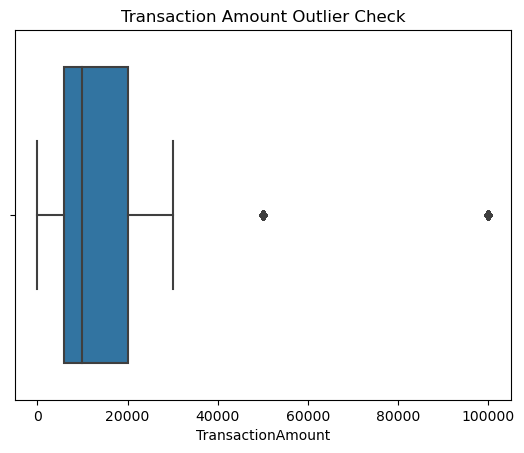

Q1 (25th percentile): 6000.0
Median (Q2): 10000.0
Q3 (75th percentile): 20000.0
IQR (Q3 - Q1): 14000.0
Lower whisker: 0
Upper whisker: 30000
Outliers: [50000, 50000, 100000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 100000, 100000, 50000, 100000, 50000, 50000, 50000, 100000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 100000, 50000, 50000, 50000, 100000, 50000, 50000, 100000, 50000, 50000, 100000, 50000, 50000, 50000, 100000, 50000, 50000, 100000, 50000, 50000, 100000, 50000, 100000, 50000, 100000, 50000, 50000, 100000, 50000, 100000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 100000, 50000, 50000, 50000, 100000, 50000, 50000, 50000, 50000, 50000, 100000, 100000, 50000, 50000, 50000, 50000, 50000, 100000, 100000, 50000, 50000, 100000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 100000, 50000, 50000, 50000, 100000, 50000, 50000, 50000, 50000, 50000, 50000, 50000, 100000, 50000, 50000, 50000, 50000, 100000, 50000, 50000, 100000, 50000, 5

In [13]:
# Check for outliers in transaction_amount
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=atm_transactions["TransactionAmount"])
plt.title("Transaction Amount Outlier Check")
plt.show()

# Extract values
q1 = atm_transactions["TransactionAmount"].quantile(0.25)
q2 =atm_transactions["TransactionAmount"].median()
q3 = atm_transactions["TransactionAmount"].quantile(0.75)
iqr = q3 - q1

# Whiskers
lower_whisker = atm_transactions["TransactionAmount"][atm_transactions["TransactionAmount"] >= (q1 - 1.5 * iqr)].min()
upper_whisker = atm_transactions["TransactionAmount"][atm_transactions["TransactionAmount"] <= (q3 + 1.5 * iqr)].max()

# Outliers
outliers = atm_transactions["TransactionAmount"][(atm_transactions["TransactionAmount"] < lower_whisker) | (atm_transactions["TransactionAmount"] > upper_whisker)]

# Print results
print(f"Q1 (25th percentile): {q1}")
print(f"Median (Q2): {q2}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Q3 - Q1): {iqr}")
print(f"Lower whisker: {lower_whisker}")
print(f"Upper whisker: {upper_whisker}")
print(f"Outliers: {list(outliers)}")


In [12]:
high_values = atm_transactions[atm_transactions["TransactionAmount"] > 30000]
print(high_values["TransactionAmount"].value_counts())


50000     129421
100000     37514
Name: TransactionAmount, dtype: int64


In [ ]:
atm_transactions.to_csv("cleaned_transactions_for_tableau.csv", index=False)